In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import time, datetime

In [17]:
data=pd.read_csv('./Ordinal_Encoding.csv')

<Axes: xlabel='price'>

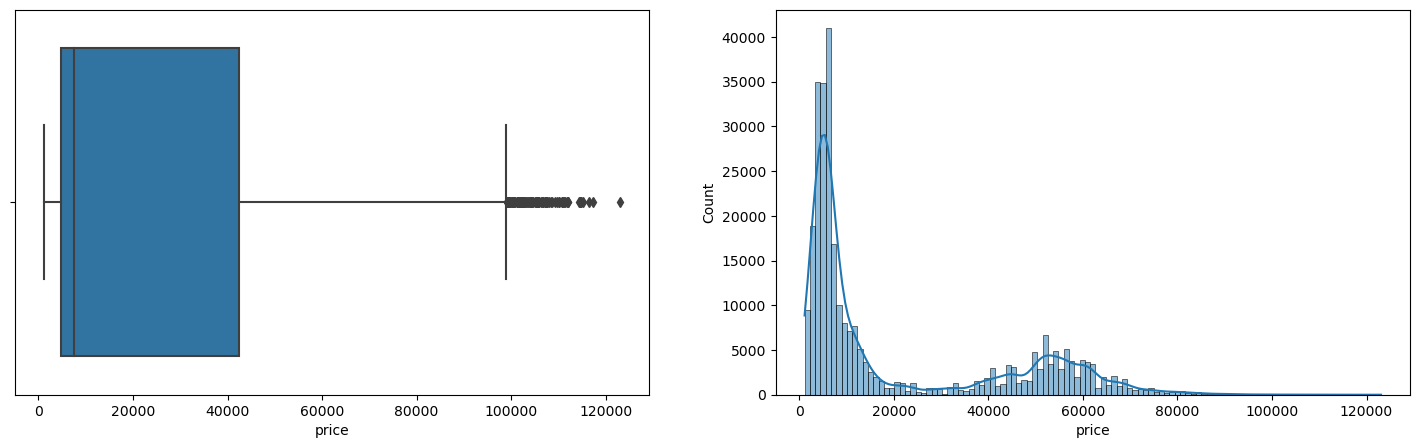

In [18]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)

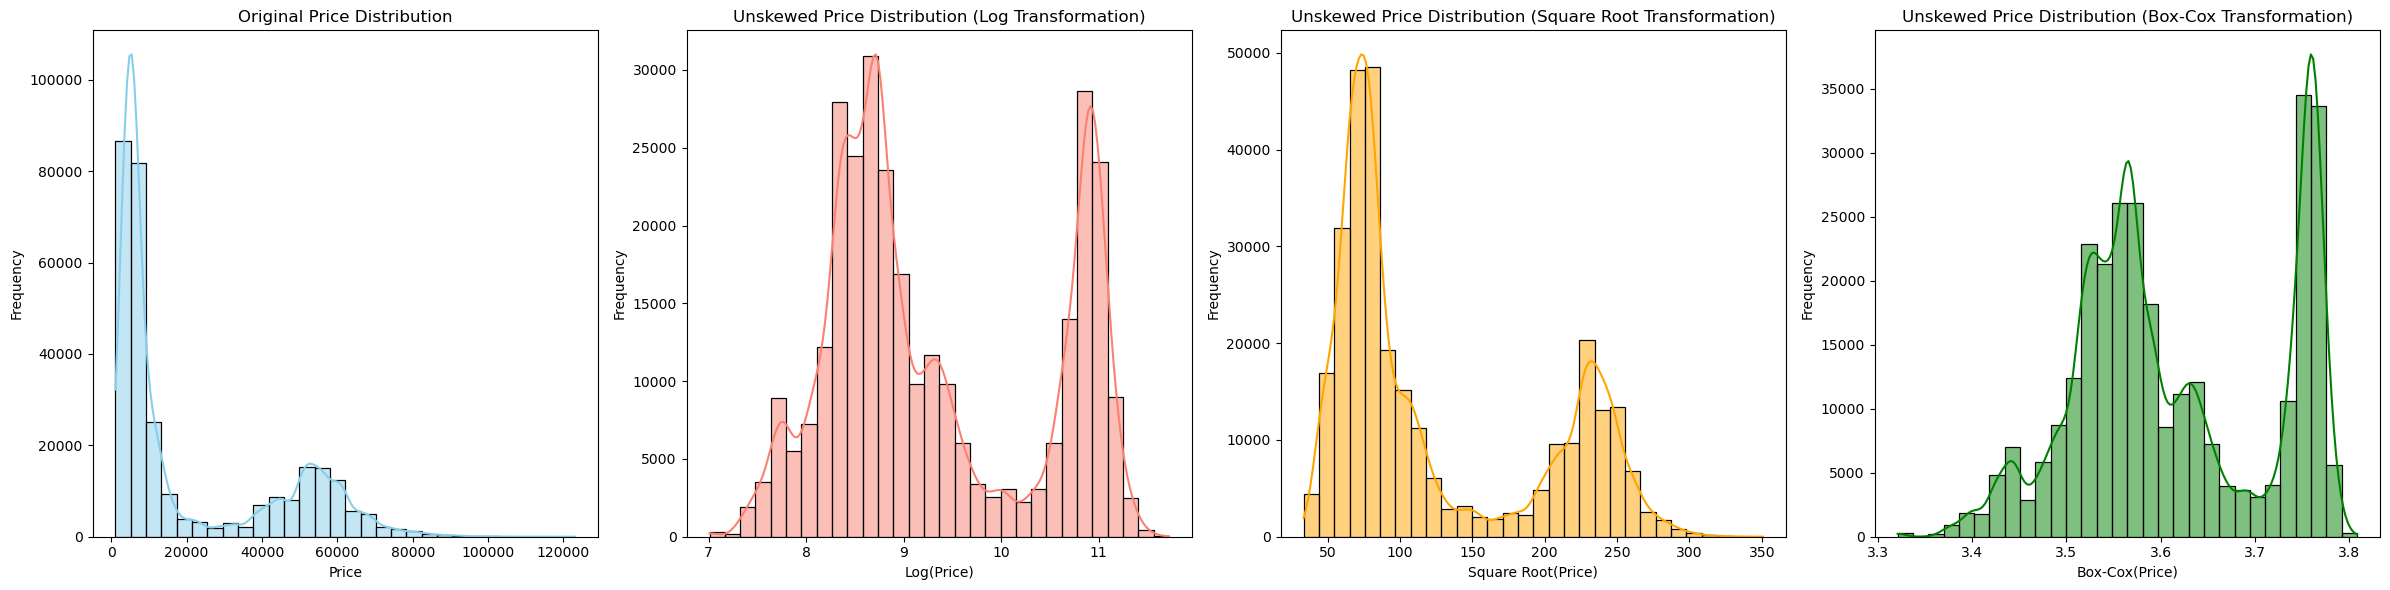

In [19]:
data['price_unskewed_boxcox'], _ = boxcox(data['price'])
data['price_unskewed_sqrt'] = np.sqrt(data['price'])
data['price_unskewed'] = np.log(data['price'])

# Visualize the original and transformed distributions
plt.figure(figsize=(24, 6))  # Increase the figure size for better visualization

# Original distribution
plt.subplot(1, 4, 1)  # Adjust the subplot layout to accommodate four plots
sns.histplot(data=data, x='price', kde=True, color='skyblue', bins=30)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Logarithmic transformation
plt.subplot(1, 4, 2)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed', kde=True, color='salmon', bins=30)
plt.title('Unskewed Price Distribution (Log Transformation)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# Square root transformation
plt.subplot(1, 4, 3)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed_sqrt', kde=True, color='orange', bins=30)
plt.title('Unskewed Price Distribution (Square Root Transformation)')
plt.xlabel('Square Root(Price)')
plt.ylabel('Frequency')

# Box-Cox transformation
plt.subplot(1, 4, 4)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed_boxcox', kde=True, color='green', bins=30)
plt.title('Unskewed Price Distribution (Box-Cox Transformation)')
plt.xlabel('Box-Cox(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [36]:
data.describe(include='all')

,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,class,duration,days_left,price,dest_city_id,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos
count,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,2.999990e+05,299999.000000,299999.000000,2.999990e+05
mean,2.955153,3.741732,2.577365,12.982760,1.833573,0.924673,15.241217,2.584475,2.587989,0.688376,733.460458,26.005763,20897.897916,2.419965,-2.829035e-02,-0.252139,-0.275697,-5.301239e-03
std,2.003258,3.002821,1.751668,5.362041,1.378340,0.397794,6.047971,1.359204,1.744774,0.463158,431.510760,13.558573,22700.630886,1.783123,7.882493e-01,0.560617,0.669709,6.895334e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000,1105.000000,0.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00
25%,1.000000,0.000000,1.000000,8.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.000000,410.000000,15.000000,4783.000000,1.000000,-8.660254e-01,-0.707107,-0.866025,-7.071068e-01
50%,3.000000,3.000000,2.000000,12.000000,2.000000,1.000000,17.000000,2.000000,3.000000,1.000000,675.000000,26.000000,7425.000000,2.000000,1.224647e-16,-0.258819,-0.500000,-1.836970e-16
75%,5.000000,7.000000,4.000000,18.000000,3.000000,1.000000,20.000000,4.000000,4.000000,1.000000,970.000000,38.000000,42521.000000,4.000000,8.660254e-01,0.258819,0.258819,7.071068e-01
max,6.000000,7.000000,5.000000,23.000000,5.000000,2.000000,23.000000,5.000000,5.000000,1.000000,2990.000000,49.000000,123071.000000,5.000000,1.000000e+00,1.000000,1.000000,1.000000e+00


In [47]:
data

,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,class,...,days_left,price,dest_city_id,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,price_unskewed_boxcox,price_unskewed_sqrt,price_unskewed
0,4,4,2,18,2,0,21,4,5,1,...,1,5953,0,-1.000000e+00,-1.836970e-16,-7.071068e-01,7.071068e-01,3.562365,77.155687,8.691651
1,4,4,2,6,0,0,8,1,5,1,...,1,5953,0,1.000000e+00,6.123234e-17,8.660254e-01,-5.000000e-01,3.562365,77.155687,8.691651
2,4,1,2,4,0,0,6,0,5,1,...,1,5956,0,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,3.562423,77.175126,8.692154
3,4,7,2,10,1,0,12,3,5,1,...,1,5955,0,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00,3.562404,77.168646,8.691986
4,4,7,2,8,1,0,11,1,5,1,...,1,5955,0,8.660254e-01,-5.000000e-01,2.588190e-01,-9.659258e-01,3.562404,77.168646,8.691986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,3,7,1,9,1,1,19,2,3,0,...,49,69265,3,7.071068e-01,-7.071068e-01,-9.659258e-01,2.588190e-01,3.774750,263.182446,11.145695
300257,3,7,1,12,3,1,22,4,3,0,...,49,77105,3,1.224647e-16,-1.000000e+00,-5.000000e-01,8.660254e-01,3.781399,277.677871,11.252923
300258,3,7,1,7,0,1,20,4,3,0,...,49,79099,3,9.659258e-01,-2.588190e-01,-8.660254e-01,5.000000e-01,3.782957,281.245444,11.278456
300259,3,7,1,7,0,1,17,2,3,0,...,49,81585,3,9.659258e-01,-2.588190e-01,-9.659258e-01,-2.588190e-01,3.784831,285.630881,11.309401


In [20]:
data.drop(['price_unskewed_sqrt','price_unskewed','price'], axis=1, inplace=True)

In [21]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'dest_city_id',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox'],
      dtype='object')

Feature ranking:
1. feature 9 (0.810172)
2. feature 11 (0.090551)
3. feature 10 (0.054386)
4. feature 1 (0.033343)
5. feature 2 (0.003379)
6. feature 5 (0.002413)
7. feature 12 (0.001758)
8. feature 8 (0.001459)
9. feature 6 (0.000804)
10. feature 15 (0.000547)
11. feature 3 (0.000467)
12. feature 0 (0.000295)
13. feature 14 (0.000258)
14. feature 13 (0.000077)
15. feature 16 (0.000055)
16. feature 7 (0.000036)
17. feature 4 (0.000000)


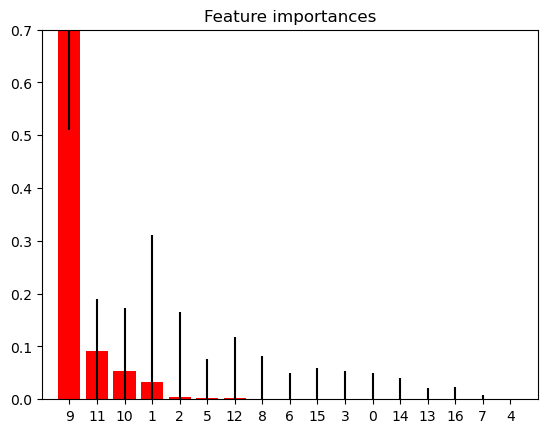

In [26]:
# Feature Importance using ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
# Build an estimator and compute the feature importances
estimator = GradientBoostingRegressor(n_estimators=100, random_state=0)
# X = data.values[:,9:-1]
# y = data.values[:,-1]
X = data.values[:,0:-1]
y = data.values[:,-1]
estimator.fit(X,y)
# Lets get the feature importances.
# Features with high importance score higher.
importances = estimator.feature_importances_
std = np.std([tree[0].feature_importances_ for tree in estimator.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
 print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.7])
plt.show()


In [27]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'dest_city_id',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox'],
      dtype='object')

In [28]:
data[['class', 'duration', 'days_left']].values

array([[  1, 130,   1],
       [  1, 140,   1],
       [  1, 130,   1],
       ...,
       [  0, 830,  49],
       [  0, 600,  49],
       [  0, 605,  49]], dtype=int64)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Assuming X contains the features 'class', 'duration', 'days_left' and y contains the target variable 'price_unskewed_boxcox'
# X_best =  data[['class', 'duration', 'days_left']].values
# Split the data into training and testing sets
# n_est_val = [50,100,150,200,300,400]
# for n in n_est_val:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=0)

# # Fit the model
# rf_regressor.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_regressor.predict(X_test)

# # Calculate the accuracy of the model using Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# accuracy = 1 - mse

# # Print the accuracy
# print("Accuracy of the RandomForest Regression model:", accuracy)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_regressor = grid_search.best_estimator_
  
# Evaluate the best model on the test set
y_pred = best_rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


C:\Users\haris\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
201 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\haris\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\haris\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\haris\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\haris\anaconda3\Lib\site-packa

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test MSE: 0.00020228879348226867


In [80]:
from scipy.special import inv_boxcox
# inv_boxcox(y_test,_)

array([41314.,  6296., 10604., ...,  4660.,  9420.,  5632.])

In [155]:
results_pred = inv_boxcox(y_pred,_)
print("    Y_TEST            Y_RESULTS_PRED ")
print("_______________________________________")
for i in range(50):
    print(inv_boxcox(y_test,_)[i], ": " ,results_pred[i])

    Y_TEST            Y_RESULTS_PRED 
_______________________________________
41314.00000000004 :  41722.08768812737
6295.99999999999 :  6429.6824079927965
10604.0 :  12266.551172440704
4796.000000000009 :  4862.96000282528
5955.000000000005 :  7256.121450552548
4873.000000000001 :  4496.532211365542
5231.999999999997 :  5095.250027179986
60396.00000000016 :  60191.40596248708
69244.00000000012 :  69668.72675923469
6074.9999999999945 :  6032.109029346359
2049.999999999999 :  2242.614820257305
4452.999999999995 :  4575.218873370682
6314.99999999999 :  6609.507326389592
84153.99999999987 :  64066.20215295871
3013.000000000004 :  2567.628541314906
64831.000000000124 :  64445.651818287275
1714.0000000000005 :  1792.5786419192161
6218.9999999999945 :  5682.140045494657
7489.000000000004 :  8504.524134052743
51817.00000000012 :  51794.10497724438
6600.000000000012 :  7018.323604091156
5604.999999999991 :  6110.363579207852
62523.99999999985 :  61844.33657407627
3867.000000000007 :  3752.3475

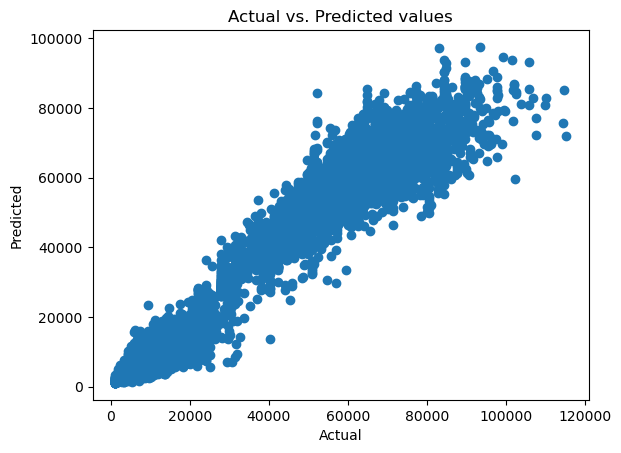

In [156]:
# import matplotlib.pyplot as plt
y_real_test = inv_boxcox(y_test,_)
y_real_pred = results_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_real_test, y_real_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted values")
plt.show()


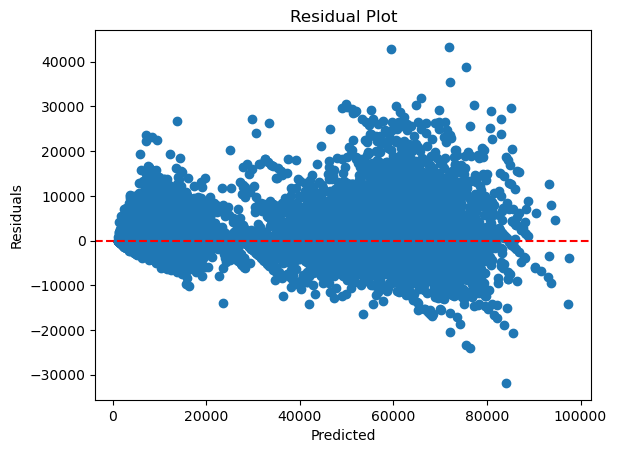

In [157]:
# Residual plot
residuals = y_real_test - y_real_pred
plt.scatter(y_real_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()


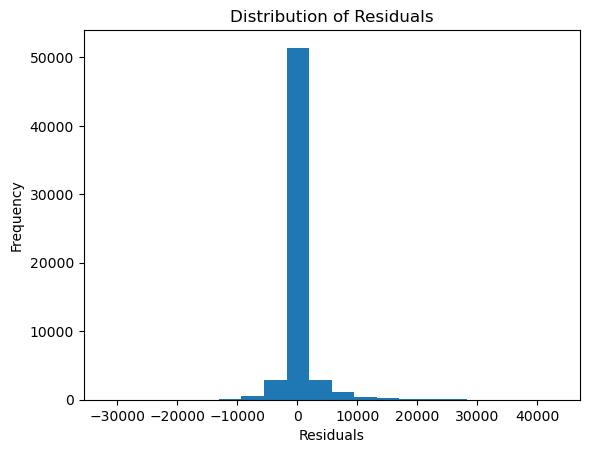

In [158]:
# Distribution of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


C:\Users\haris\AppData\Local\Temp\ipykernel_15388\3255715463.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_real_test, label='Actual', shade=True)
C:\Users\haris\AppData\Local\Temp\ipykernel_15388\3255715463.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_real_pred, label='Predicted', shade=True)


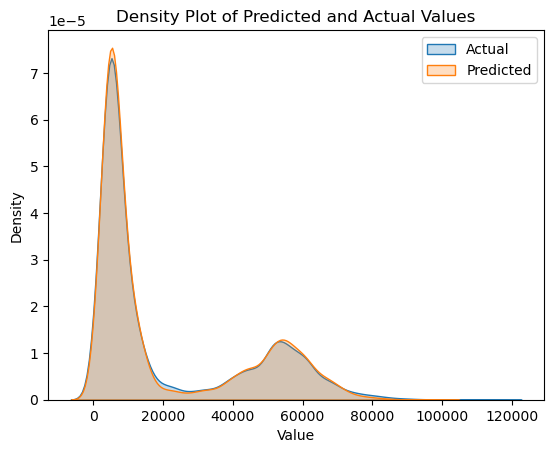

In [159]:
# Density Plot of Predicted and Actual Values
sns.kdeplot(y_real_test, label='Actual', shade=True)
sns.kdeplot(y_real_pred, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Predicted and Actual Values')
plt.legend()
plt.show()


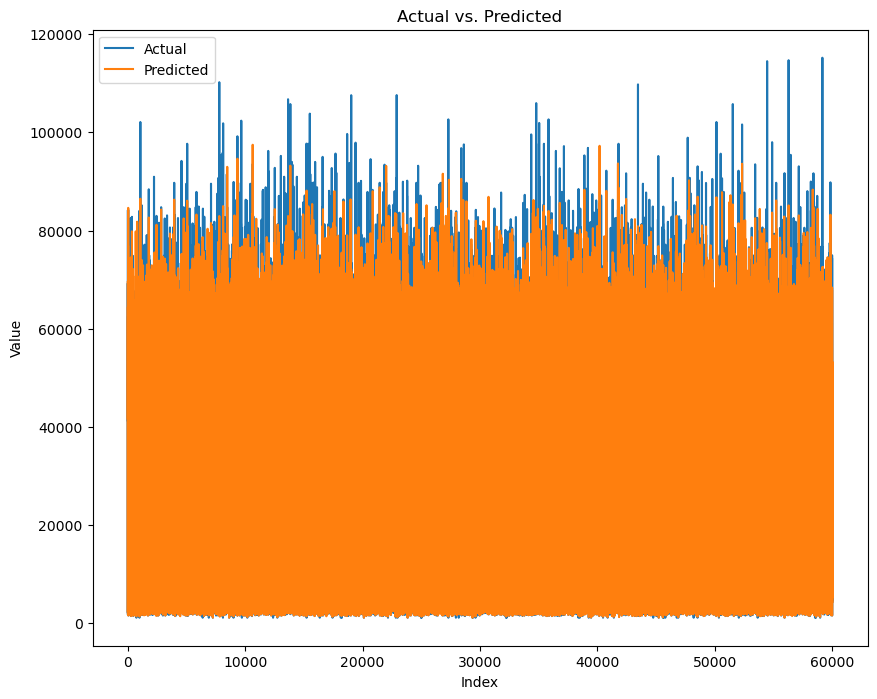

In [160]:
plt.figure(figsize=(10, 8))
plt.plot(y_real_test, label='Actual')
plt.plot(y_real_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()
